In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
df_feat = pd.read_csv("training_set_features.csv", index_col="respondent_id")
df_label = pd.read_csv("training_set_labels.csv", index_col="respondent_id")

In [3]:
print(df_feat.shape)
df_feat.head()

(26707, 35)


,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
print(df_label.shape)
df_label.head()

(26707, 2)


,xyz_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


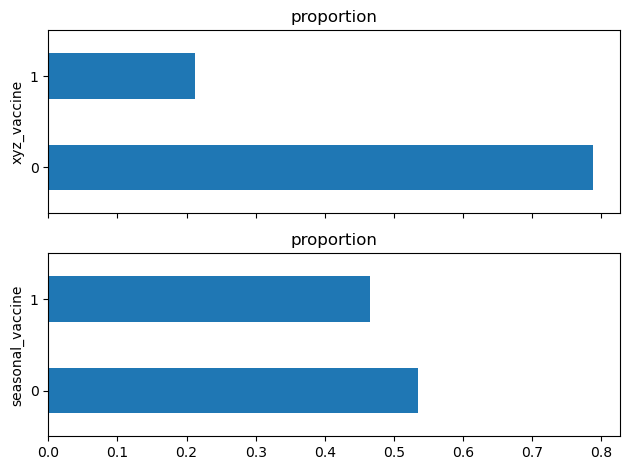

In [5]:
fig, ax = plt.subplots(2, 1, sharex=True)
n = df_label.shape[0]

(df_label['xyz_vaccine'].value_counts().div(n).plot.barh(title="proportion", ax=ax[0]))
ax[0].set_ylabel("xyz_vaccine")

(df_label['seasonal_vaccine'].value_counts().div(n).plot.barh(title="proportion", ax=ax[1]))
ax[1].set_ylabel("seasonal_vaccine")

fig.tight_layout()

In [6]:
pd.crosstab(df_label["xyz_vaccine"], df_label["seasonal_vaccine"], margins=True, normalize=True)

seasonal_vaccine,0,1,All
xyz_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


In [7]:
joined = df_feat.join(df_label)
print(joined.shape)
joined.head()

(26707, 37)


,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [8]:
joined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   xyz_concern                  26615 non-null  float64
 1   xyz_knowledge                26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_xyz              24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker        

In [9]:
def rate_plot(col, target, data, ax=None):
    cnt = joined[[target, col]].groupby([target, col]).size().unstack(target)
    gc = cnt.sum(axis='columns')
    pr = cnt.div(gc, axis='index')

    pr.plot(kind="bar", stacked=True, ax=ax)
    ax.legend().remove()

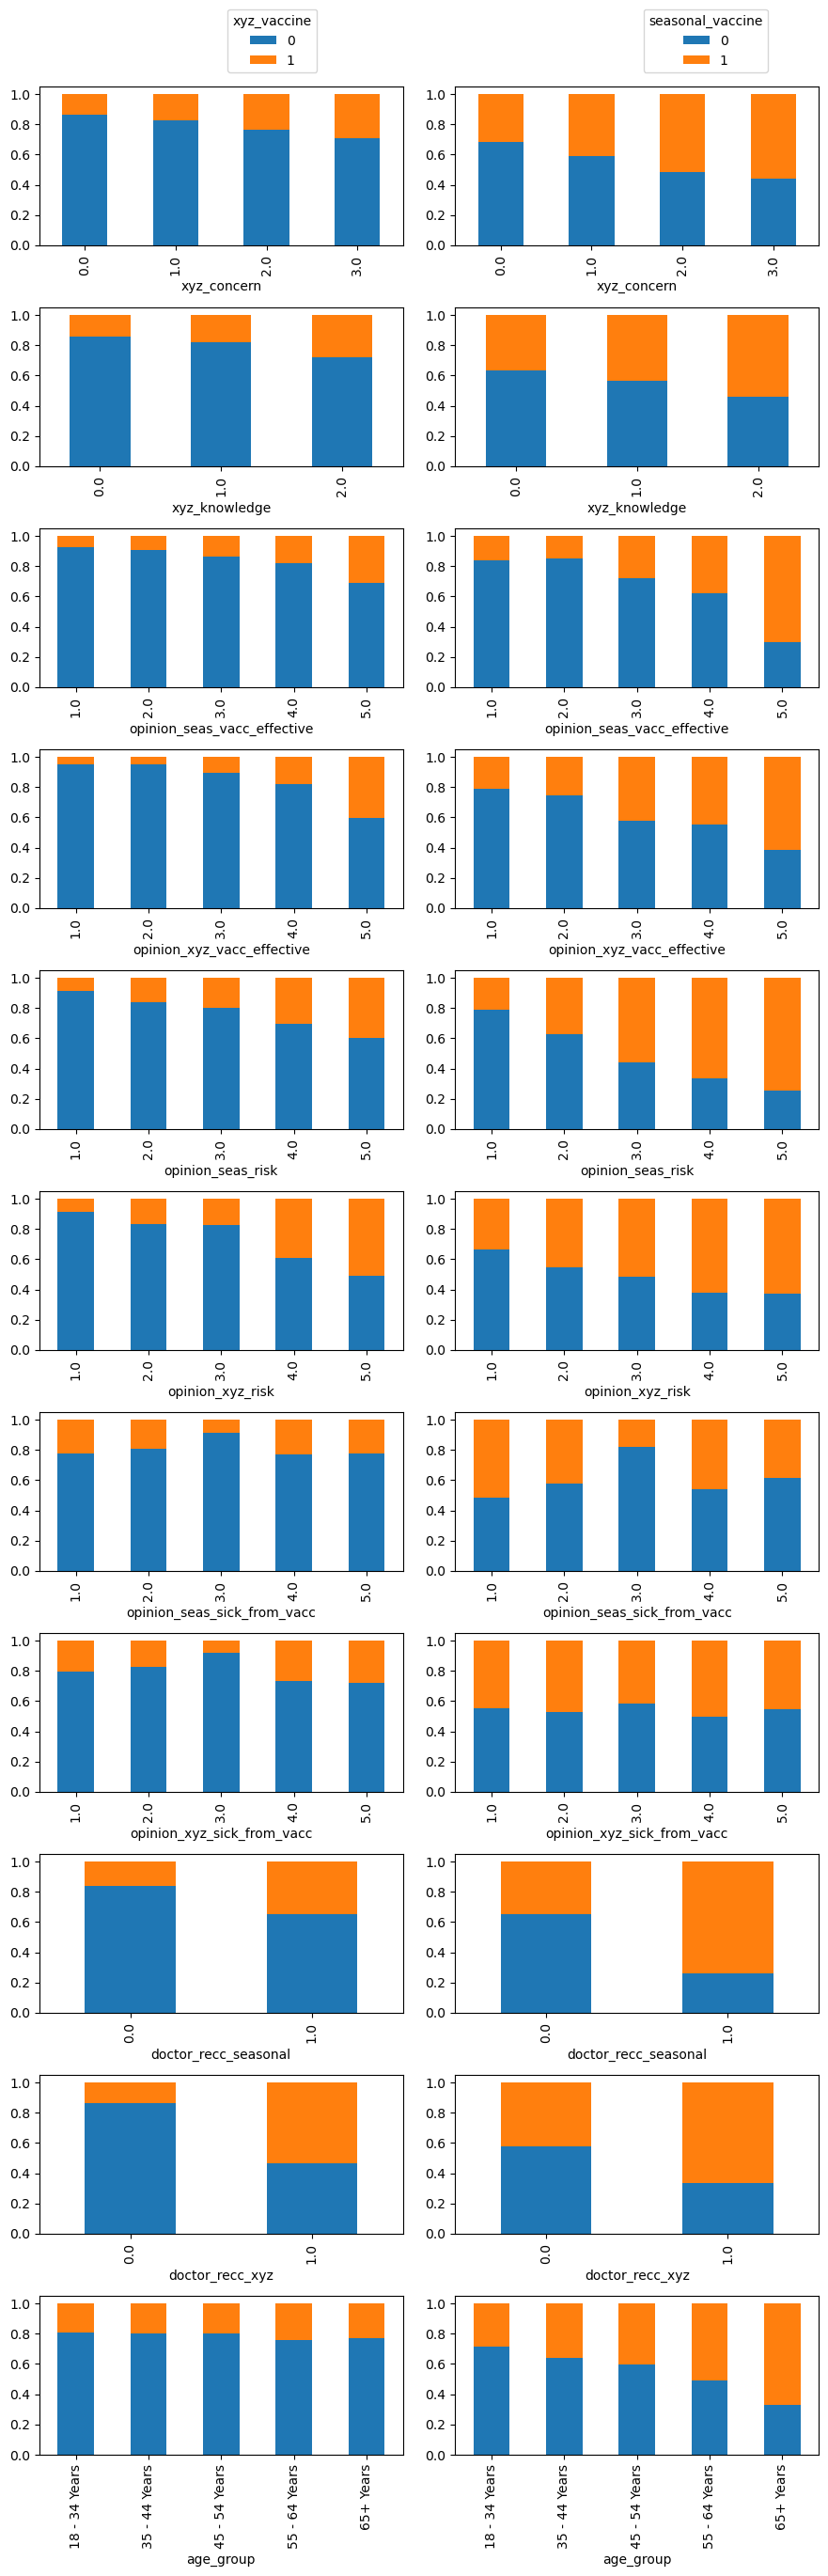

In [10]:
to_plot = [
    'xyz_concern',
    'xyz_knowledge',
    'opinion_seas_vacc_effective',
    'opinion_xyz_vacc_effective',
    'opinion_seas_risk',
    'opinion_xyz_risk',
    'opinion_seas_sick_from_vacc',
    'opinion_xyz_sick_from_vacc',
    'doctor_recc_seasonal',
    'doctor_recc_xyz',
    'age_group',
]

fig, ax = plt.subplots(len(to_plot), 2, figsize=(9,len(to_plot)*2.5))
for idx, col in enumerate(to_plot):
    rate_plot(col, 'xyz_vaccine', joined, ax=ax[idx, 0])
    rate_plot(col, 'seasonal_vaccine', joined, ax=ax[idx, 1])
    
ax[0, 0].legend(bbox_to_anchor=(0.5, 1.05), title='xyz_vaccine')
ax[0, 1].legend(bbox_to_anchor=(0.5, 1.05), title='seasonal_vaccine')
fig.tight_layout()

In [59]:
numeric_cols = df_feat.columns[df_feat.dtypes != "object"].values
print(numeric_cols)

['xyz_concern' 'xyz_knowledge' 'behavioral_antiviral_meds'
 'behavioral_avoidance' 'behavioral_face_mask' 'behavioral_wash_hands'
 'behavioral_large_gatherings' 'behavioral_outside_home'
 'behavioral_touch_face' 'doctor_recc_xyz' 'doctor_recc_seasonal'
 'chronic_med_condition' 'child_under_6_months' 'health_worker'
 'health_insurance' 'opinion_xyz_vacc_effective' 'opinion_xyz_risk'
 'opinion_xyz_sick_from_vacc' 'opinion_seas_vacc_effective'
 'opinion_seas_risk' 'opinion_seas_sick_from_vacc' 'household_adults'
 'household_children']


In [60]:
numeric_preprocessing_steps = Pipeline([
    ('standard_scaler', StandardScaler()),
    ('simple_imputer', SimpleImputer(strategy='median'))
])

preprocessor = ColumnTransformer(
    transformers = [("numeric", numeric_preprocessing_steps, numeric_cols)],
    remainder = "drop"
)

In [61]:
estimators = MultiOutputClassifier(estimator=LogisticRegression(penalty="l2", C=1))

In [63]:
lr_model = Pipeline([("preprocessor", preprocessor),("estimators", estimators),])
lr_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       'be...
       'doctor_recc_xyz', 'doctor_recc_seasonal', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'health_insurance',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc',
       'household_adults', 'household_children'], dtype=object))])),
                ('estimators',
                 MultiOutputClassifier(estimator=LogisticRegression(C=1)))])

In [64]:
X_train, X_eval, y_train, y_eval = train_test_split(
    df_feat,
    df_label,
    test_size=0.33,
    shuffle=True,
    stratify=df_label,
    random_state=4444
)

In [65]:
lr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       'be...
       'doctor_recc_xyz', 'doctor_recc_seasonal', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'health_insurance',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc',
       'household_adults', 'household_children'], dtype=object))])),
                ('estimators',
                 MultiOutputClassifier(estimator=LogisticRegression(C=1)))])

In [66]:
lr_model.predict_proba(X_eval)

[array([[0.98938359, 0.01061641],
        [0.74844067, 0.25155933],
        [0.95934973, 0.04065027],
        ...,
        [0.09060476, 0.90939524],
        [0.39604158, 0.60395842],
        [0.55294674, 0.44705326]]),
 array([[0.92407805, 0.07592195],
        [0.35447672, 0.64552328],
        [0.64611562, 0.35388438],
        ...,
        [0.0222264 , 0.9777736 ],
        [0.40554286, 0.59445714],
        [0.28012553, 0.71987447]])]

In [67]:
print(lr_model.predict_proba(X_eval)[0].shape)
print(lr_model.predict_proba(X_eval)[1].shape)

(8814, 2)
(8814, 2)


In [69]:
predict = pd.DataFrame(
    {
        "xyz_vaccine": lr_model.predict_proba(X_eval)[0][:, 1],
        "seasonal_vaccine": lr_model.predict_proba(X_eval)[1][:, 1],
    },
    index = y_eval.index
)
print(predict.shape)
predict.head()

(8814, 2)


,xyz_vaccine,seasonal_vaccine
respondent_id,,
10949,0.010616,0.075922
12371,0.251559,0.645523
8220,0.040650,0.353884
16193,0.612049,0.895430
16949,0.064861,0.152428


In [70]:
roc_auc_score(y_eval, predict)

0.8288174189022935

In [71]:
print("Training: {:6.2f}%".format(100*lr_model.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*lr_model.score(X_eval, y_eval)))

Training:  65.39%
Test set:  64.85%


In [72]:
lr_model.fit(df_feat, df_label)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('standard_scaler',
                                                                   StandardScaler()),
                                                                  ('simple_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  array(['xyz_concern', 'xyz_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask',
       'behavioral_wash_hands', 'behavioral_large_gatherings',
       'be...
       'doctor_recc_xyz', 'doctor_recc_seasonal', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'health_insurance',
       'opinion_xyz_vacc_effective', 'opinion_xyz_risk',
       'opinion_xyz_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc',
       'household_adults', 'household_children'], dtype=object))])),
                ('estimators',
                 MultiOutputClassifier(estimator=LogisticRegression(C=1)))])

In [73]:
df_test_feat = pd.read_csv("test_set_features.csv", index_col="respondent_id")

In [74]:
final_proba = lr_model.predict_proba(df_test_feat)
final_proba

[array([[0.87280333, 0.12719667],
        [0.94475602, 0.05524398],
        [0.62906951, 0.37093049],
        ...,
        [0.80411015, 0.19588985],
        [0.9492446 , 0.0507554 ],
        [0.38421362, 0.61578638]]),
 array([[0.57359831, 0.42640169],
        [0.92876678, 0.07123322],
        [0.3626162 , 0.6373838 ],
        ...,
        [0.59872448, 0.40127552],
        [0.68003071, 0.31996929],
        [0.35787941, 0.64212059]])]

In [76]:
my_submission = pd.read_csv("submission_format.csv", index_col="respondent_id")
my_submission = my_submission.rename(columns=({'h1n1_vaccine':'xyz_vaccine'}))
my_submission.head()

,xyz_vaccine,seasonal_vaccine
respondent_id,,
26707,0.5,0.7
26708,0.5,0.7
26709,0.5,0.7
26710,0.5,0.7
26711,0.5,0.7


In [77]:
my_submission["xyz_vaccine"] = final_proba[0][:, 1]
my_submission["seasonal_vaccine"] = final_proba[1][:, 1]

In [78]:
my_submission.head()

,xyz_vaccine,seasonal_vaccine
respondent_id,,
26707,0.127197,0.426402
26708,0.055244,0.071233
26709,0.370930,0.637384
26710,0.464351,0.803446
26711,0.286673,0.634903


In [79]:
my_submission.to_csv('taes_submission.csv', index=True)